# WINE QUALTIY ANALYSIS- iNeuron Internship Project

## Presented by SHRUTI KHANDELWAL

### Dataset Information

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009],

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Datasets downloaded from : https://archive.ics.uci.edu/ml/datasets/wine+quality

### Attribute Information:



Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\New folder\winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Total number of rows and columns

In [3]:
df.shape

(6497, 13)

##### Complete information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#renaming columns
df.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide' : 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Checking for duplicates

In [8]:
df.duplicated().sum()

1168

##### Removing duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
#After dropping duplicate values, our dataset has rows and columns : 
df.shape

(5329, 13)

In [12]:
df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Checking for null values

In [13]:
df.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

##### Filling out null values

In [14]:
#Filling null values with mean/median
df['fixed_acidity'] = df['fixed_acidity'].fillna(df['fixed_acidity'].median())
df['fixed_acidity'].isnull().sum()

0

In [15]:
df['volatile_acidity'].fillna(df['volatile_acidity'].mean(), inplace=True)
df['citric_acid'].fillna(df['citric_acid'].mean(), inplace=True)
df['residual_sugar'].fillna(df['residual_sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)
df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Statistical information analysis

In [16]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.216166,0.344123,0.318738,5.053839,0.056665,30.060143,114.189341,0.994536,3.224434,0.533250,10.548539,5.796022
std,1.317988,0.168102,0.147075,4.503160,0.036838,17.815588,56.781422,0.002966,0.160140,0.149669,1.186134,0.879922
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Some outliers can be seen in the statistical analysis, let's plot them and seen in details.


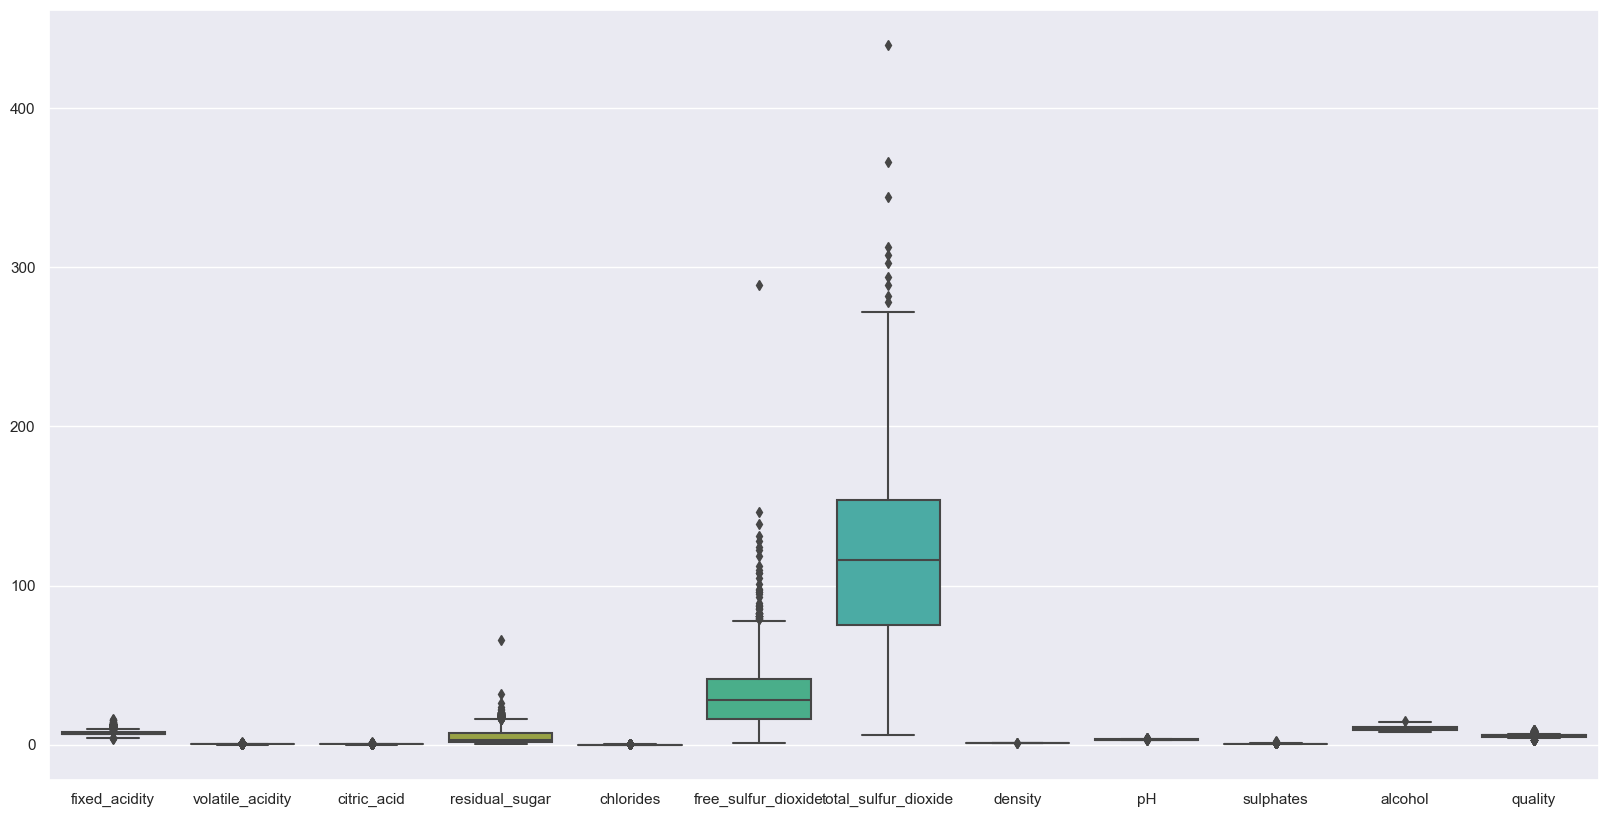

In [17]:
sns.set(rc = {'figure.figsize' : (20,10)})
sns.boxplot(data=df)
plt.show()

Outliers can be seen in 3 columns: residual sugar, free sulfur dioxide, total sulfur dioxide. Let's remove them.

In [18]:
#Removing outliers in free sulfur dioxide
lower = df['free_sulfur_dioxide'].mean()-3*df['free_sulfur_dioxide'].std()
upper = df['free_sulfur_dioxide'].mean()+3*df['free_sulfur_dioxide'].std()
df = df[(df['free_sulfur_dioxide']>lower) & (df['free_sulfur_dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = df['total_sulfur_dioxide'].mean()-3*df['total_sulfur_dioxide'].std()
upper = df['total_sulfur_dioxide'].mean()+3*df['total_sulfur_dioxide'].std()
df = df[(df['total_sulfur_dioxide']>lower) & (df['total_sulfur_dioxide']<upper)]

#Removing outliers in residual sugar
lower = df['residual_sugar'].mean()-3*df['residual_sugar'].std()
upper = df['residual_sugar'].mean()+3*df['residual_sugar'].std()
df = df[(df['residual_sugar']>lower) & (df['residual_sugar']<upper)]

In [19]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000
mean,7.219914,0.344893,0.317961,4.917547,0.056783,29.522931,113.038535,0.994486,3.225557,0.533705,10.556159,5.800571
std,1.322397,0.168608,0.145936,4.227824,0.037040,16.615659,55.848559,0.002868,0.159673,0.149956,1.184002,0.876999
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.120000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,115.000000,0.994600,3.220000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.400000,0.066500,40.000000,152.000000,0.996700,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,18.500000,0.611000,83.000000,282.000000,1.003690,4.010000,2.000000,14.900000,9.000000


### One hot encoding

In [20]:
dum = pd.get_dummies(df.type, drop_first = True)
df = pd.concat([df, dum], axis = 1)
df.sample(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white
2321,white,4.6,0.445,0.00,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2,5,1
2408,white,7.5,0.705,0.10,13.0,0.044,44.0,214.0,0.99741,3.10,0.50,9.1,5,1
4952,red,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,6,0
2263,white,6.9,0.300,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,5,1
6358,red,6.4,0.420,0.09,2.3,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,6,0


In [21]:
df.drop('type', axis =1 , inplace = True)

In [22]:
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white
5978,10.3,0.27,0.56,1.40,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6,0
6064,9.9,0.54,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5,0
4339,6.8,0.24,0.29,2.00,0.044,15.0,96.0,0.99232,3.23,0.64,10.4,8,1
2101,6.8,0.28,0.35,2.30,0.042,16.0,85.0,0.99060,3.19,0.56,12.4,6,1
6054,8.5,0.18,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,0
4233,6.3,0.23,0.33,6.90,0.052,23.0,118.0,0.99380,3.23,0.46,10.4,6,1
3352,6.7,0.36,0.28,8.30,0.034,29.0,81.0,0.99151,2.96,0.39,12.5,6,1
2064,6.6,0.22,0.28,4.90,0.042,51.0,180.0,0.99520,3.30,0.75,9.5,6,1
2122,6.9,0.26,0.33,12.60,0.051,59.0,173.0,0.99800,3.39,0.38,9.9,5,1
2739,6.8,0.32,0.28,4.80,0.034,25.0,100.0,0.99026,3.08,0.47,12.4,7,1


Now 0 represents red wine, 1 represents white wine.

### EDA

##### Univariate Analysis

In [23]:
print("Min quality unit is ", df.quality.min())
print("Max quality unit is ", df.quality.max())
print(df.quality.value_counts())

Min quality unit is  3
Max quality unit is  9
6    2298
5    1725
7     851
4     204
8     147
3      25
9       5
Name: quality, dtype: int64


In [24]:
df['residual_sugar'] = np.log(1 + df['residual_sugar'])

<Axes: xlabel='residual_sugar', ylabel='Density'>

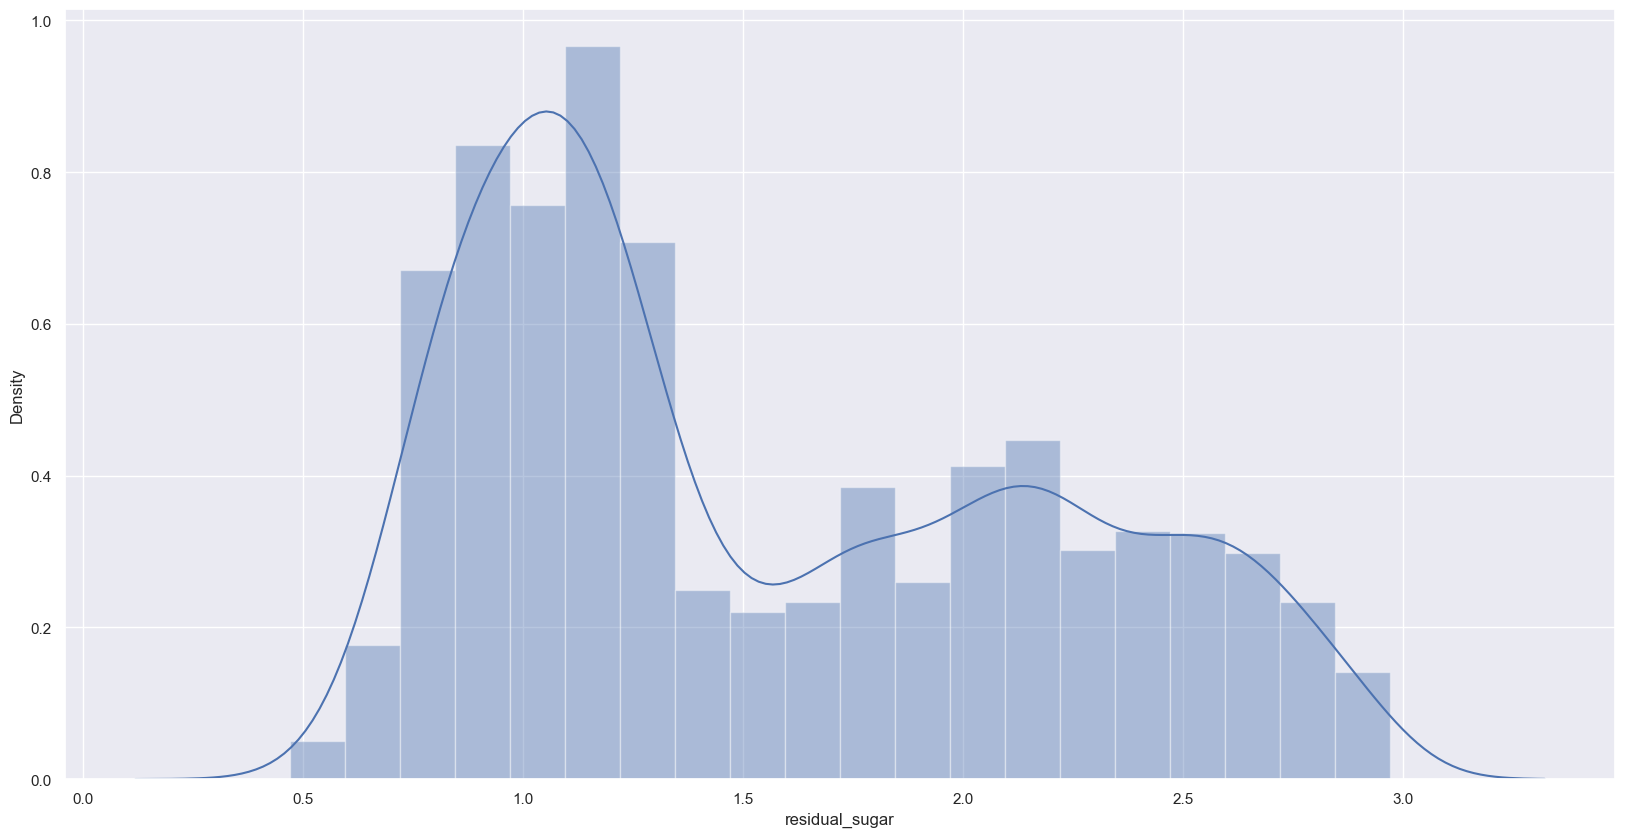

In [25]:
sns.distplot(df['residual_sugar'])

##### Bivariate Analysis

Relationship between Fixed Acidity and Quality.

<Axes: xlabel='quality', ylabel='fixed_acidity'>

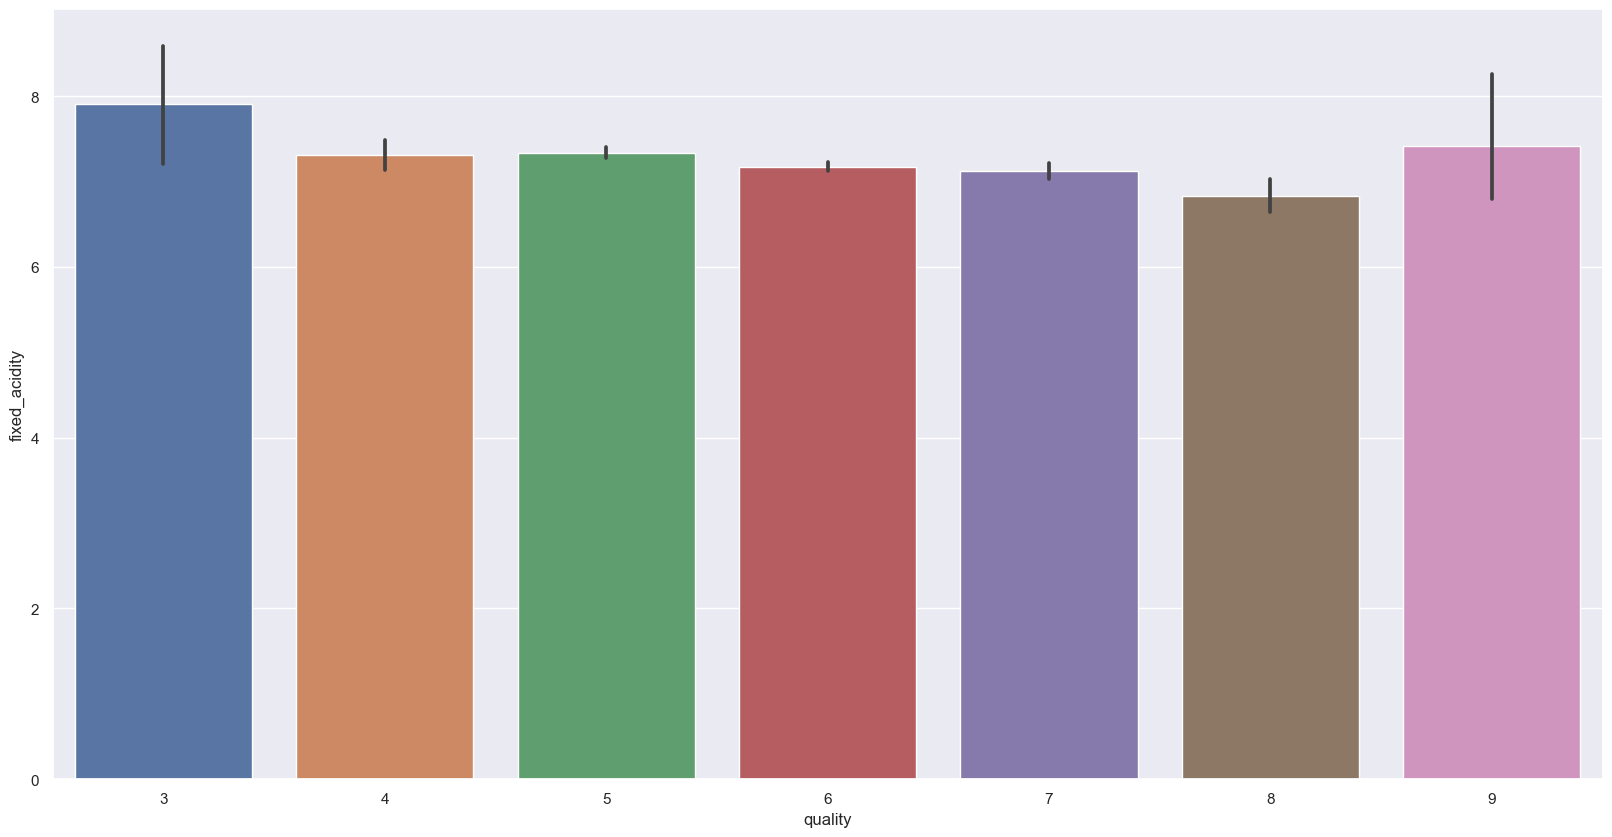

In [26]:
sns.barplot(x = df['quality'], y=df['fixed_acidity'])

Relationship between Volatile Acidity and Quality.

<Axes: xlabel='quality', ylabel='volatile_acidity'>

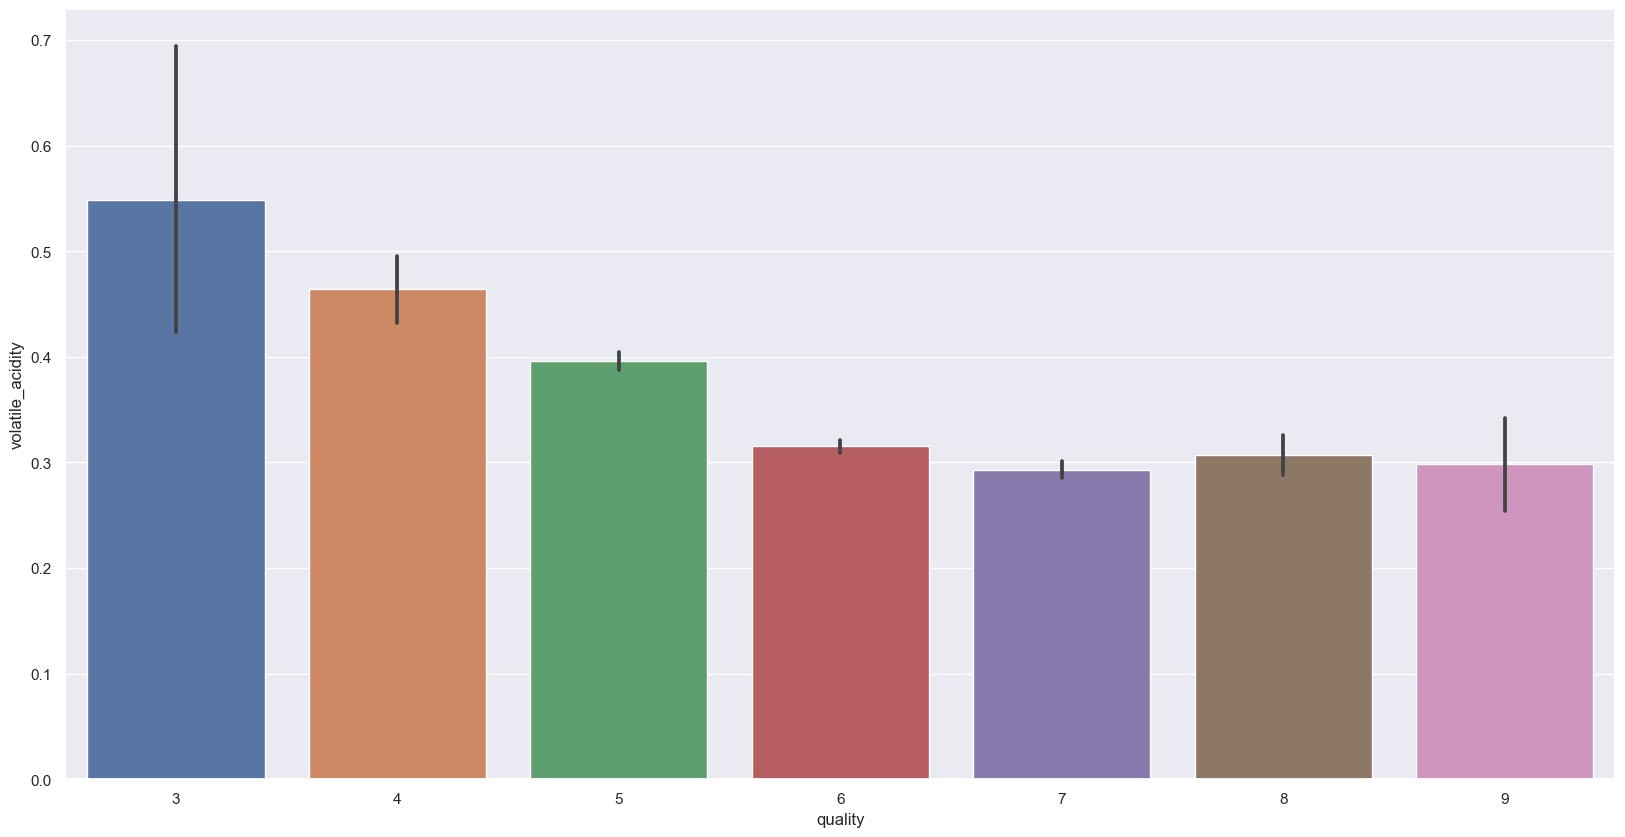

In [27]:
sns.barplot(x = df['quality'], y=df['volatile_acidity'])

Relationship between Alcohol and Quality.

<Axes: xlabel='quality', ylabel='alcohol'>

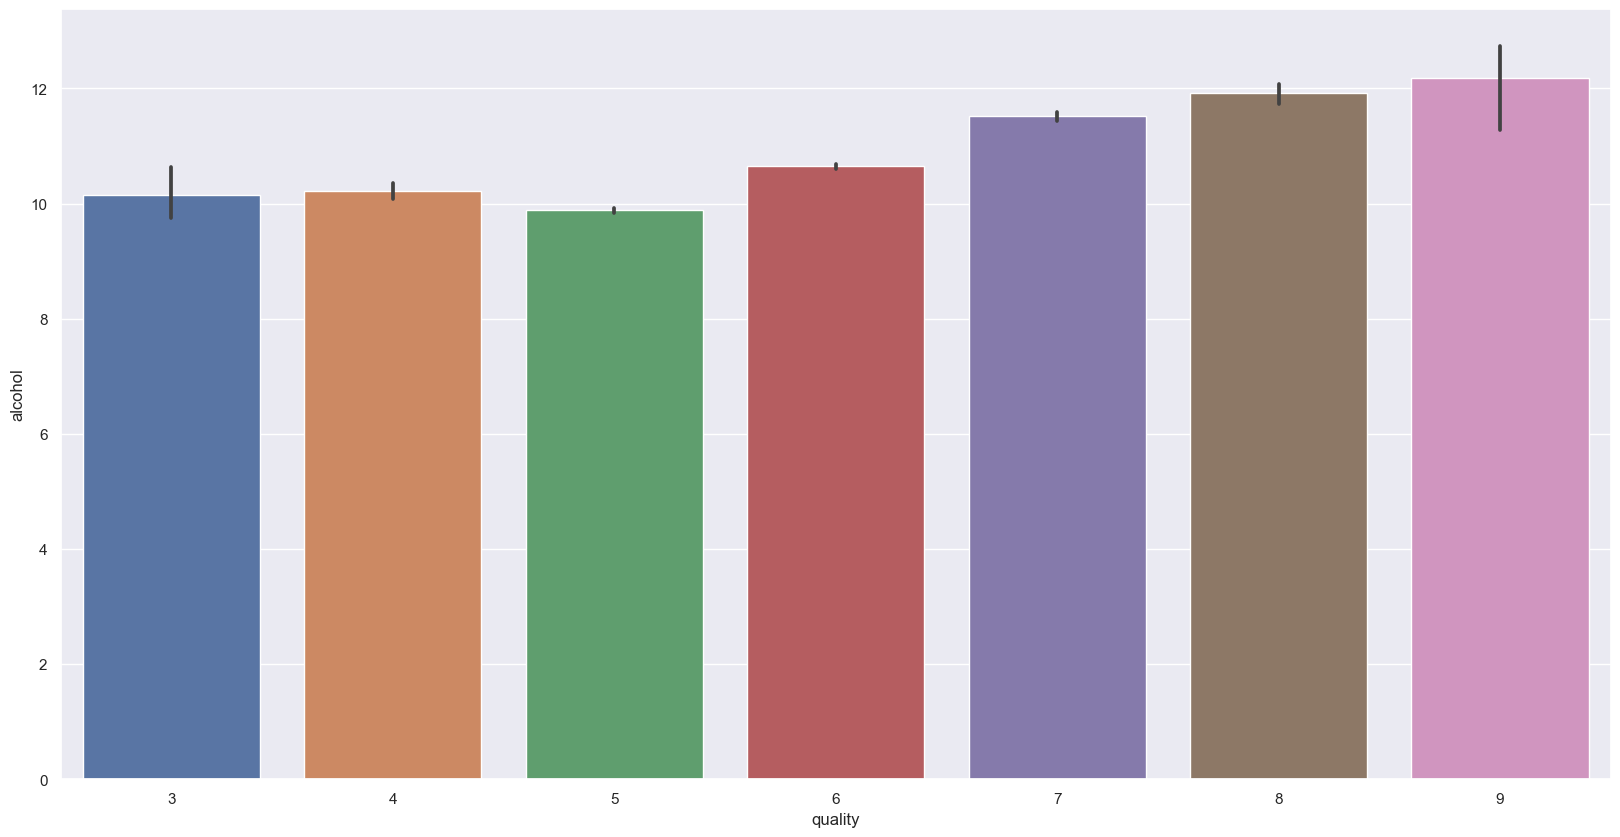

In [28]:
sns.barplot(x = df['quality'], y=df['alcohol'])

Relationship between Citric Acid and Quality.

<Axes: xlabel='quality', ylabel='citric_acid'>

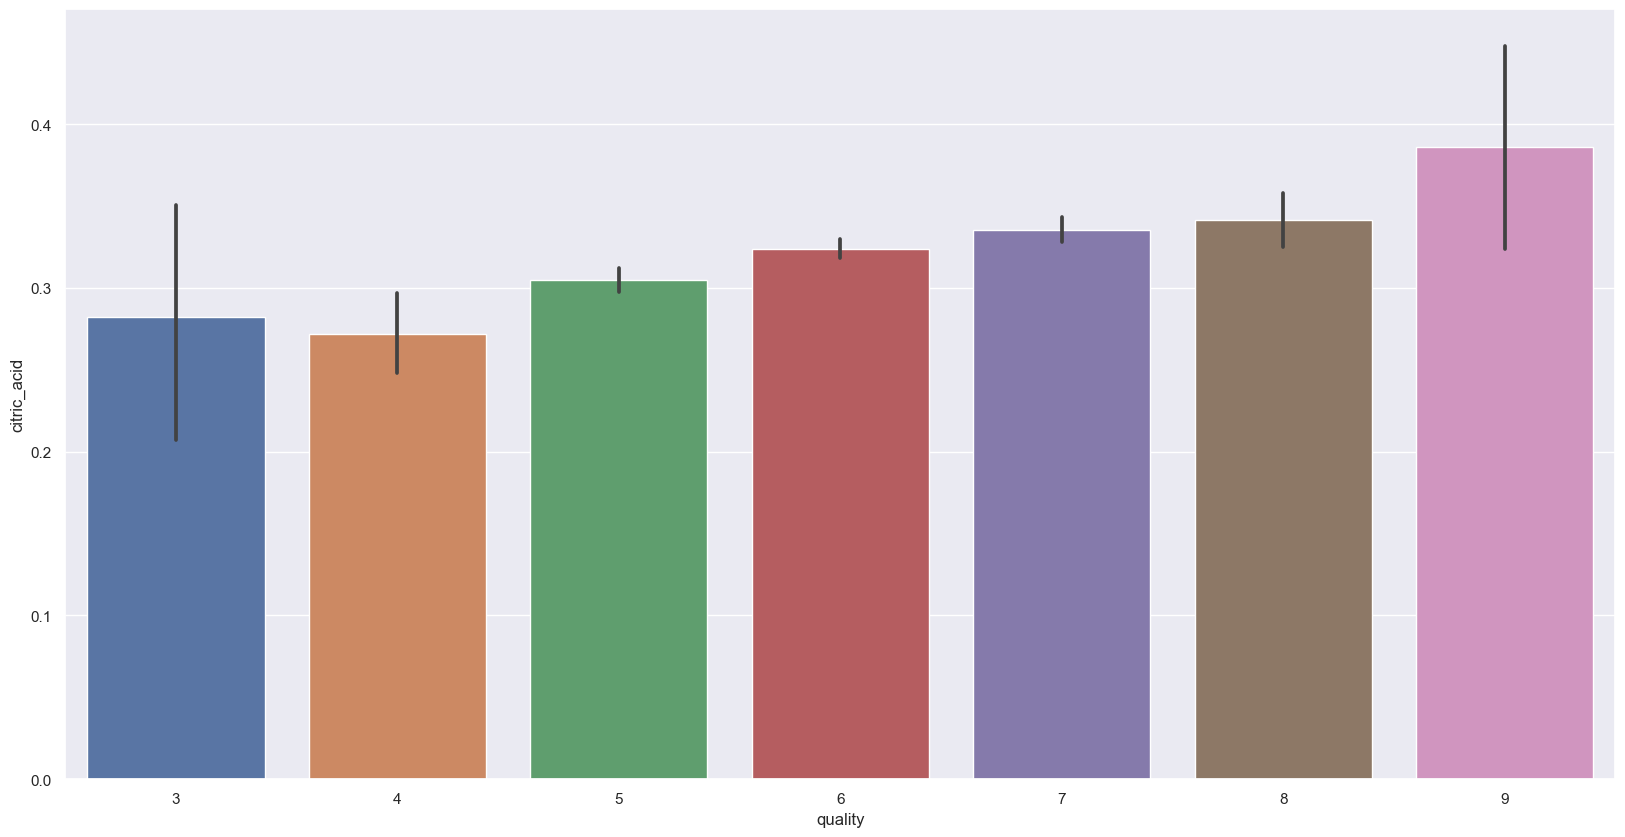

In [29]:
sns.barplot(x = df['quality'], y=df['citric_acid'])

Relationship between Chlorides and Quality.

<Axes: xlabel='quality', ylabel='chlorides'>

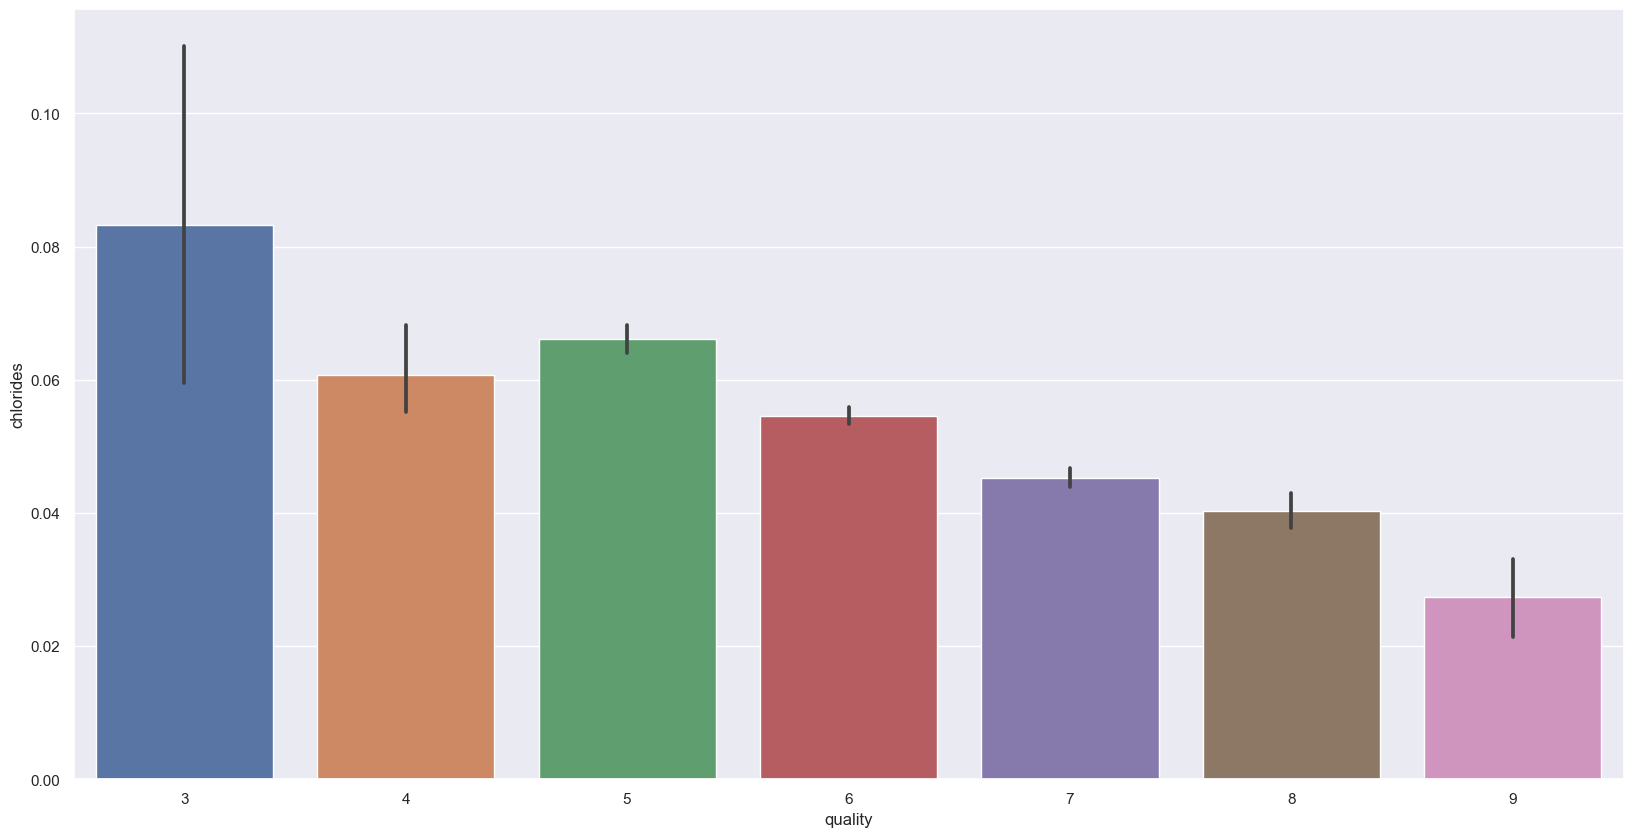

In [30]:
sns.barplot(x = df['quality'], y=df['chlorides'])

Relationship between Total Sulfur Dioxide and Quality.

<Axes: xlabel='quality', ylabel='total_sulfur_dioxide'>

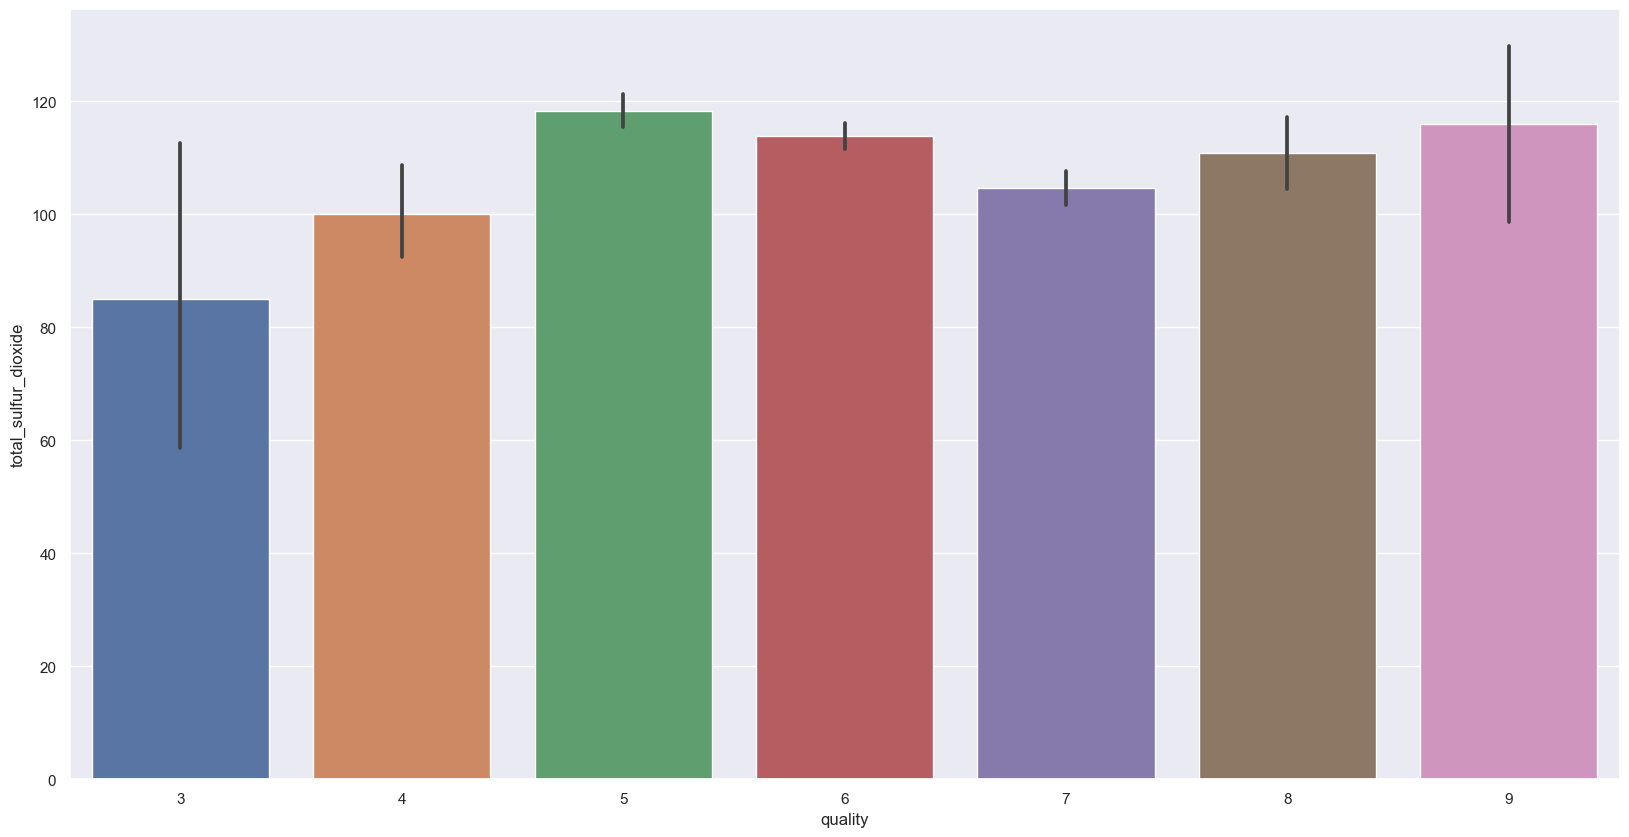

In [31]:
sns.barplot(x = df['quality'], y=df['total_sulfur_dioxide'])

Relationship between Free Sulfur Dioxide and Quality.

<Axes: xlabel='quality', ylabel='free_sulfur_dioxide'>

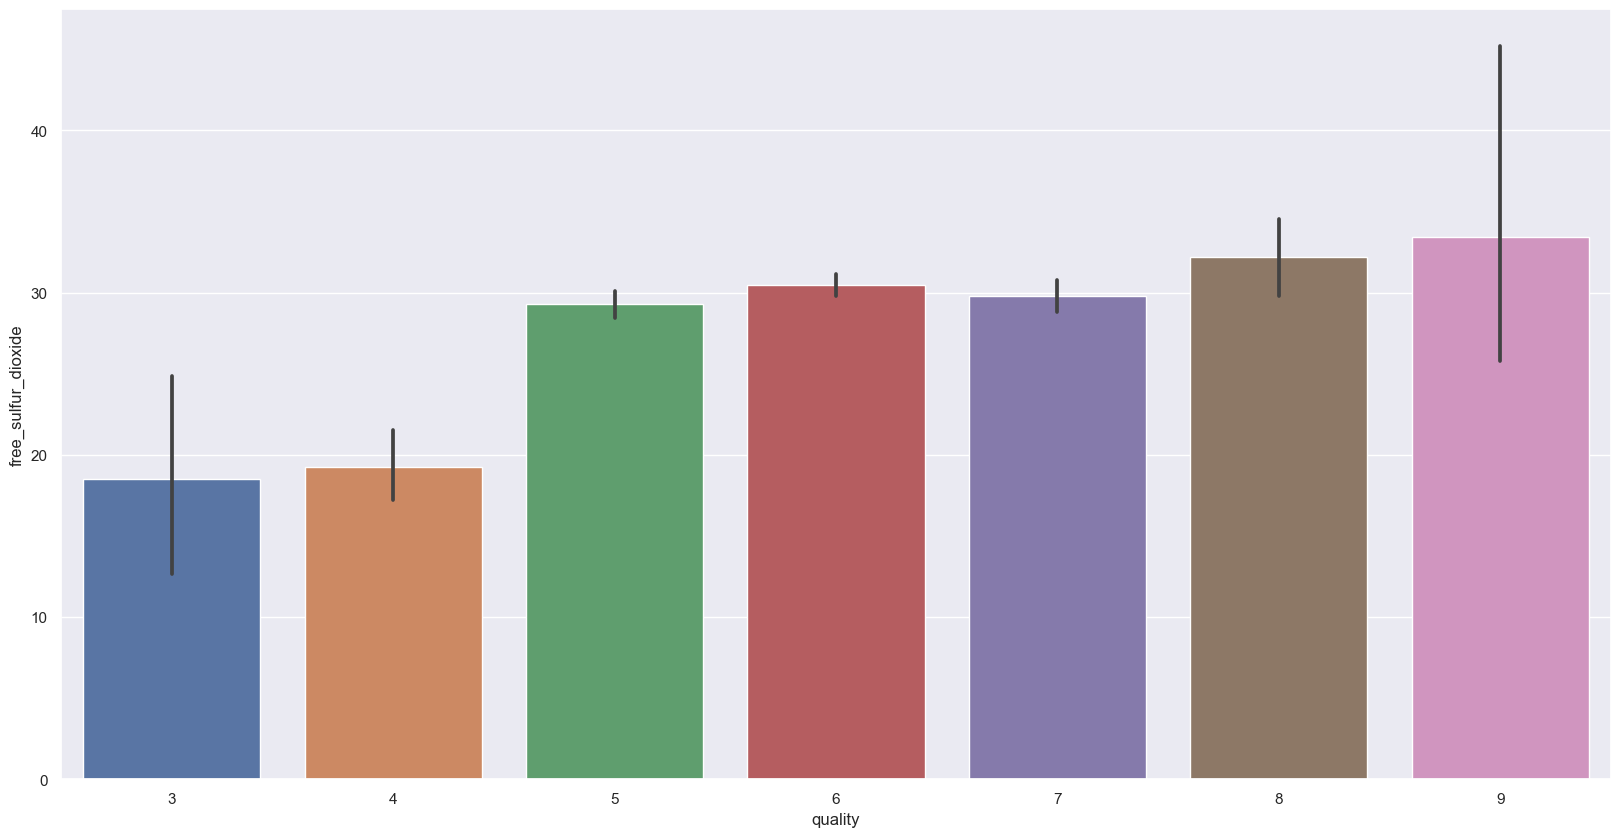

In [32]:
sns.barplot(x = df['quality'], y=df['free_sulfur_dioxide'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white
fixed_acidity,1.000000,0.214020,0.331274,-0.096740,0.289761,-0.293157,-0.335112,0.497247,-0.270410,0.309030,-0.105752,-0.080027,-0.487487
volatile_acidity,0.214020,1.000000,-0.392012,-0.146930,0.367744,-0.360929,-0.405910,0.313700,0.245704,0.227022,-0.070302,-0.267713,-0.646091
citric_acid,0.331274,-0.392012,1.000000,0.123624,0.057461,0.147954,0.194285,0.088670,-0.347515,0.063409,-0.010869,0.099823,0.184851
residual_sugar,-0.096740,-0.146930,0.123624,1.000000,-0.119801,0.424853,0.487999,0.464491,-0.215395,-0.167355,-0.269365,-0.030409,0.309430
chlorides,0.289761,0.367744,0.057461,-0.119801,1.000000,-0.192708,-0.272722,0.387678,0.024857,0.406489,-0.272532,-0.204557,-0.499987
free_sulfur_dioxide,-0.293157,-0.360929,0.147954,0.424853,-0.192708,1.000000,0.727263,0.001980,-0.151757,-0.213893,-0.172766,0.084868,0.484841
total_sulfur_dioxide,-0.335112,-0.405910,0.194285,0.487999,-0.272722,0.727263,1.000000,-0.012588,-0.221548,-0.280793,-0.247469,-0.036270,0.701815
density,0.497247,0.313700,0.088670,0.464491,0.387678,0.001980,-0.012588,1.000000,0.046776,0.300950,-0.687014,-0.336993,-0.458098
pH,-0.270410,0.245704,-0.347515,-0.215395,0.024857,-0.151757,-0.221548,0.046776,1.000000,0.162613,0.092755,0.038572,-0.310693
sulphates,0.309030,0.227022,0.063409,-0.167355,0.406489,-0.213893,-0.280793,0.300950,0.162613,1.000000,-0.021841,0.038139,-0.491362


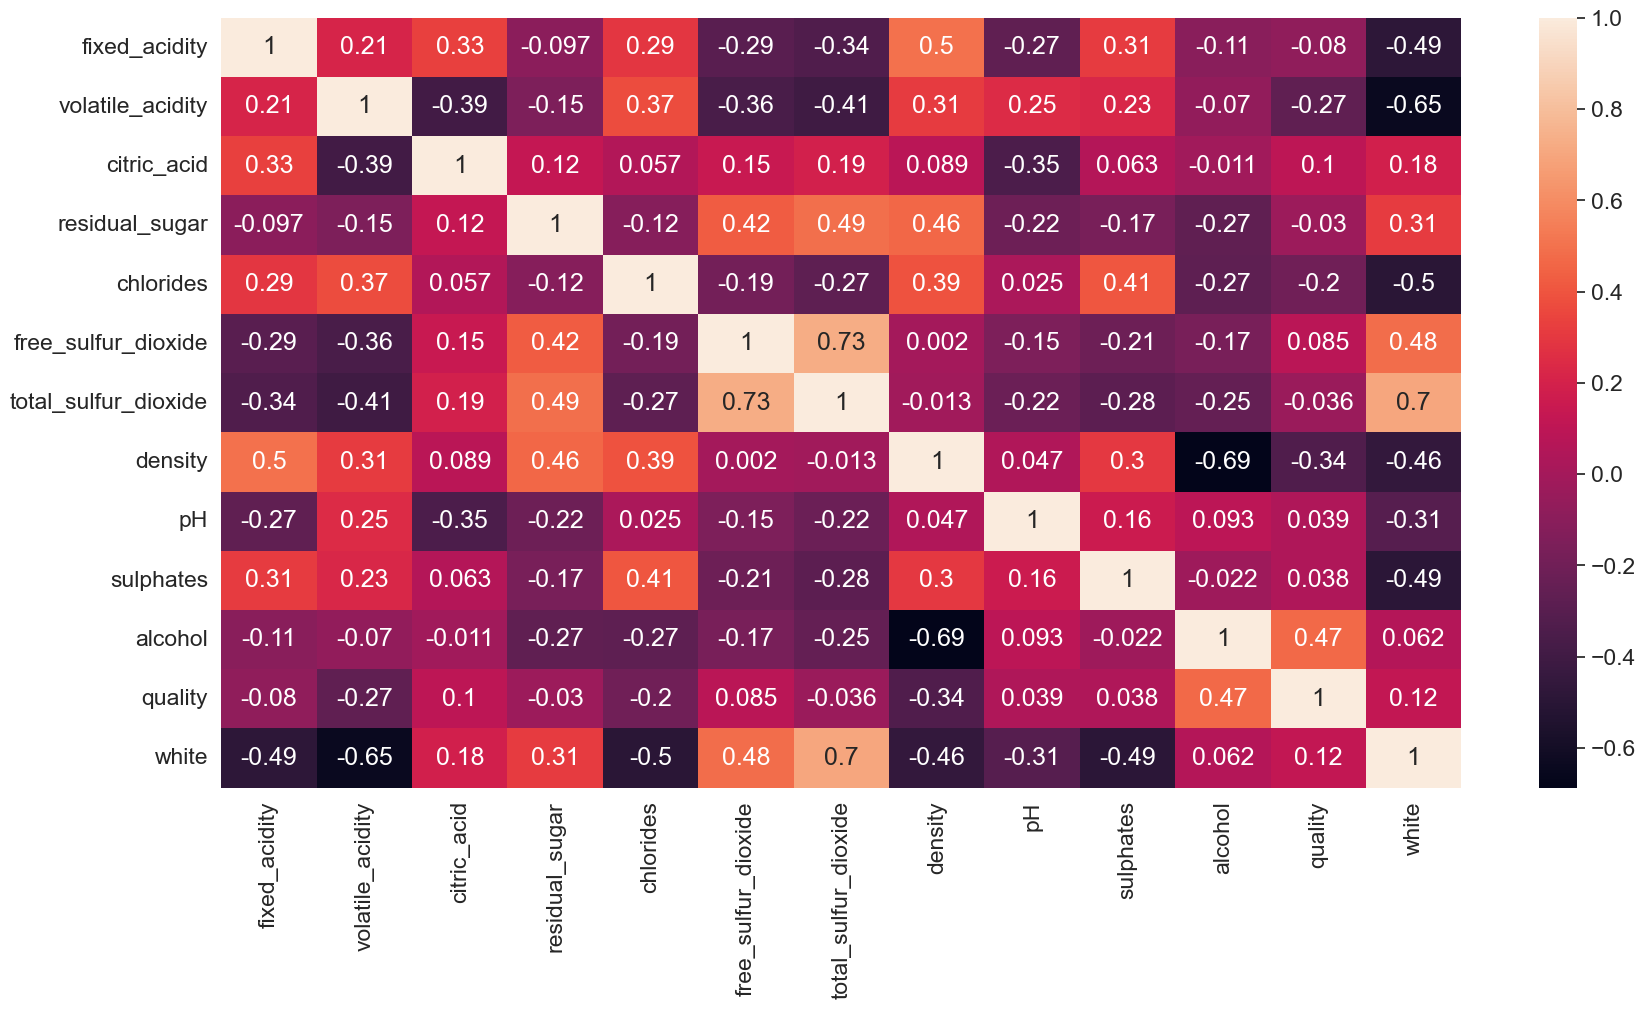

In [33]:
#finding relationship between features
corr= df.corr()
sns.set(font_scale = 1.5)
plt.figure(figsize=(20,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
corr

#### Mapping values for target variable

In [34]:
df['quality']=df['quality'].map({3:'low', 4:'low', 5:'medium', 6:'medium', 7:'medium', 8:'high', 9:'high'})
df['quality']=df['quality'].map({'low':0,'medium':1,'high':2})

## Model Development

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
X = df.drop(['quality','white'], axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>= 1 else 0)

In [37]:
print(X.head())
print(X.shape)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1            6.3              0.30         0.34        0.955511      0.049   
2            8.1              0.28         0.40        2.066863      0.050   
3            7.2              0.23         0.32        2.251292      0.058   
6            6.2              0.32         0.16        2.079442      0.045   
9            8.1              0.22         0.43        0.916291      0.044   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  
1      9.5  
2     10.1  
3      9.9  
6      9.6  
9     11.0  
(5255, 1

In [38]:
print(y.sample(5))

1325    1
983     1
5124    1
4029    1
2823    1
Name: quality, dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =2)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4204, 11) (1051, 11) (4204,) (1051,)


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
pr = lr.predict(X_test)
sc = accuracy_score(y_test, pr)
print("Accuracy is ", sc * 100)

Accuracy is  96.09895337773548


### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
mod = DecisionTreeClassifier()
print(mod.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [47]:
mod.fit(X_train, y_train)
y_pred_mod = mod.predict(X_test)
score_mod = accuracy_score(y_test, y_pred_mod)
print("Accuracy is ", score_mod * 100)

Accuracy is  94.48144624167459


### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [49]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy is ", score * 100)

Accuracy is  96.28924833491912


In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        41
           1       0.96      1.00      0.98      1010

    accuracy                           0.96      1051
   macro avg       0.98      0.52      0.54      1051
weighted avg       0.96      0.96      0.95      1051



Choosing Random Forest Classifier for predicting quality of wine.

### Predicitng Wine Quality

In [52]:
data = (9.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.2)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')
    
print(prediction)

Wine Quality is Good
[1]


In [53]:
data = (4.2,0.215,0.23,1.808289,0.041,64.0,157.0,0.99688,3.42,0.44,8.0)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')
    
print(prediction)

Wine Quality is Bad
[0]


In [54]:
data = (6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')

Wine Quality is Good


In [55]:
!pip install streamlit 

  Using cached streamlit-1.21.0-py2.py3-none-any.whl (9.7 MB)
  Using cached pyarrow-11.0.0-cp310-cp310-win_amd64.whl (20.6 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached rich-13.3.4-py3-none-any.whl (238 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached tzlocal-4.3-py3-none-any.whl (20 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached Pygments-2.15.0-py3-none-any.whl (1.1 MB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Usin

In [61]:
import streamlit as st

In [62]:
import pickle

In [63]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [64]:
#loading the saved model
loaded_model = pickle.load(open(r'C:\Users\USER\Downloads\New folder\trained_model.sav', 'rb'))

In [65]:
data = (4.2,0.215,0.23,1.808289,0.041,64.0,157.0,0.99688,3.42,0.44,8.0)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = loaded_model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')

Wine Quality is Bad
